<a href="https://colab.research.google.com/github/akshay-seetharam/Music/blob/main/Harmonize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#All the set-up for Colab working with Music 21 was copied from this Colab, not authored by myself: https://colab.research.google.com/drive/17Fql7pyK3xsO8KmZorvb1tBoPomidCPB?authuser=1#scrollTo=GZ6v2oASn_88. It enables Colab to show and play music using the music21 python library with two packages "lilypond" and "fluidsynth"

In [ ]:
# enables music21 to render images of musical notes
print('installing lilypond...')
!apt-get install lilypond > /dev/null

# converts midi files to wav files into order to play them
print('installing fluidsynth...')
!apt-get install fluidsynth > /dev/null
!cp /usr/share/sounds/sf2/FluidR3_GM.sf2 ./font.sf2

print('done!')

installing lilypond...
Extracting templates from packages: 100%
installing fluidsynth...
done!


In [ ]:
!fluidsynth --version
!lilypond --version

FluidSynth version 1.1.9
Copyright (C) 2000-2018 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of E-mu Systems, Inc.

FluidSynth 1.1.9
GNU LilyPond 2.18.2

Copyright (c) 1996--2012 by
  Han-Wen Nienhuys <hanwen@xs4all.nl>
  Jan Nieuwenhuizen <janneke@gnu.org>
  and others.

This program is free software.  It is covered by the GNU General Public
License and you are welcome to change it and/or distribute copies of it
under certain conditions.  Invoke as `lilypond --warranty' for more
information.



In [ ]:
import music21
from IPython.display import Image, Audio
music21.__version__

def show(music):
  display(Image(str(music.write('lily.png'))))

def play(music):
  filename = music.write('mid')
  print("filename", type(filename), filename)
  !fluidsynth -ni font.sf2 $filename -F $filename\.wav -r 16000 > /dev/null
  display(Audio(filename + '.wav'))

filename <class 'str'> /tmp/music21/tmp_ki80txk.mid


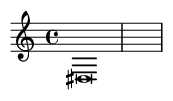

In [ ]:
n = music21.note.Note('D#3')
n.duration.type = 'breve'
play(n)
show(n)

filename <class 'str'> /tmp/music21/tmpwqbgt2zo.mid


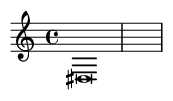

In [ ]:
c = music21.chord.Chord(['D4', 'F#4','A4'])
c.duration.type = 'half'
play(c)
show(n)

filename <class 'str'> /tmp/music21/tmpufccpmfp.mid


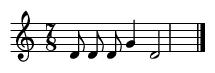

In [ ]:
littleMelody = music21.converter.parse('tinynotation: 7/8 d8 d8 d8 g4 d2')
play(littleMelody)
show(littleMelody)

filename <class 'str'> /tmp/music21/tmp3l8beqvq.mid


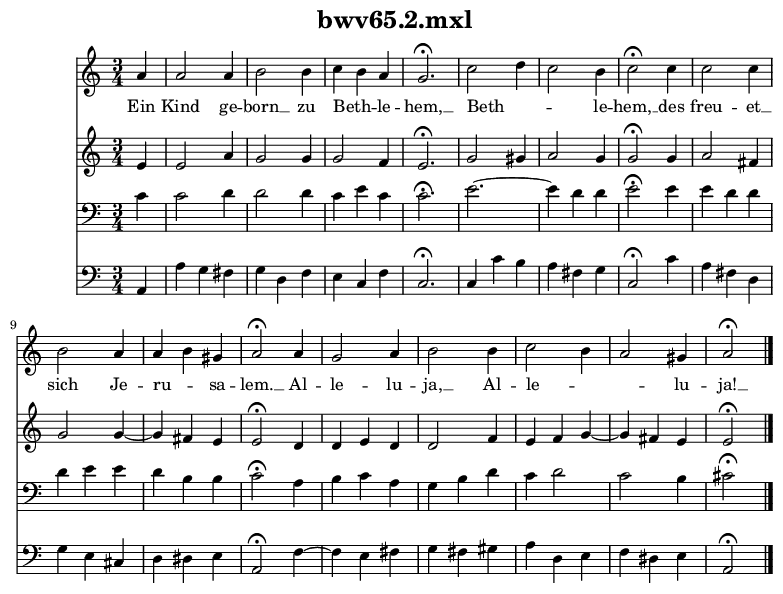

In [ ]:
bach = music21.corpus.parse('bach/bwv65.2.xml')
play(bach)
show(bach)

# Randomly generate a melody

In [ ]:
import random
import numpy as np
from music21 import *

def notify(number):
    notes = ['c', 'c#', 'd', 'd#', 'e', 'f', 'f#', 'g', 'g#', 'a', 'a#', 'b']
    return notes[(number)%12]

def numerify (note):
    notes = {'c':0, 'd':2, 'e':4, 'f':5, 'g':7, 'a':9, 'b':11}
    new_notes = notes.copy()
    for i in notes:
        sharp = i + '#'
        flat = i + 'b'
        new_notes[sharp] = (notes[i] + 1) % 12
        new_notes[flat] = (notes[i] - 1) % 12
    return new_notes[note]


    return notes.index(note)
def melody(length, key = 'C', consonant={0:True, 1:False, 2:True, 3:False, 4:True, 5:True, 6:False, 7:True, 8:False, 9:True, 10:False, 11:True}, fidelity=0.875, scale=3, cadence = None):
    """ Returns tuple of notes, music21 object, tinynotation melody

        To add: music21 key signature, cadences to work with harmonize

        This generates a melody based on the four parameters passed to it.
        
        length defines the number of notes in the melody
        consonant defines the intervals that are regarded as consonant, e.g. 5
        half-steps is, but 6 is not. The format is a dictionary of the form
        {# of half-steps: True/False} of type {int:bool}

        key is a note. Sharps are represented by c#, flats by cb, and naturals by simply c
        
        fidelity defines the probability of a note being in the key of the
        starting note. Lower fidelities allow for greater atonality, on a scale
        of 0 as least tonal to 1 as most tonal.
        
        scale defines the standard deviation of the distribution that the
        intervals are randomly selected from. High values of scale result in
        larger intervals, while smaller values of scale result in smaller
        intervals. 
        
        Returns: tuple of (playable, melody) where playable is a music21
        object and melody is the melody in tinynotation format
        """
    notes = []

    # Generate a melody
    print("Using parameters length", length, "consonant", consonant, "fidelity", fidelity, "scale", scale)
    for i in range(length):
        if i == 0:
            notes.append(numerify(key.lower()))
            continue

        # Generate new notes in the key of the starting note
        # This needs to be rewritten to include music 21's key signature feature
        interval = int(np.random.normal() * scale)
        potential_new_note = notes[i-1] + interval
        while not consonant[(potential_new_note - notes[0]) % 12]:
            interval = int(np.random.normal() * scale)
            potential_new_note = notes[i-1] + interval
            # Chance of an accidental
            if random.random() > fidelity:
                break

        notes.append(potential_new_note)
    print(notes)

    # Convert the melody into music21 format
    melody = 'tinynotation: 4/4 '
    for i in notes:
        a_note = notify(i)
        durations = [16, 8, 4, 2]
        duration = durations[random.randint(0, 3)]
        melody += a_note + str(duration) + ' '

    melody = melody.strip()
    print(melody)

    playable = music21.converter.parse(melody)
    play(playable)
    show(playable)
    return notes, playable, melody



In [ ]:
def harmonize(notes, key, tolerance = 0.1, cadence = None):
    """ harmonizes a melody in the form of a list of notes, returns the necessary chords"""
    major = [4, 3]
    minor = [3, 4]
    # number of half-steps
    


    

Using parameters length 40 consonant {0: True, 1: False, 2: True, 3: False, 4: True, 5: True, 6: False, 7: True, 8: False, 9: True, 10: False, 11: True} fidelity 1.0 scale 5
[0, -8, -8, -10, -15, -15, -17, -22, -20, -17, -17, -20, -17, -22, -19, -19, -19, -12, -15, -20, -20, -22, -29, -27, -29, -29, -29, -31, -31, -39, -37, -48, -48, -51, -51, -56, -63, -60, -70, -70]
tinynotation: 4/4 c16 e16 e8 d4 a16 a16 g8 d4 e8 g16 g4 e4 g2 d16 f16 f8 f4 c2 a8 e8 e4 d8 g8 a4 g16 g8 g16 f2 f2 a8 b8 c4 c2 a8 a8 e8 a4 c2 d8 d16
filename <class 'str'> /tmp/music21/tmpinb2sfy5.mid


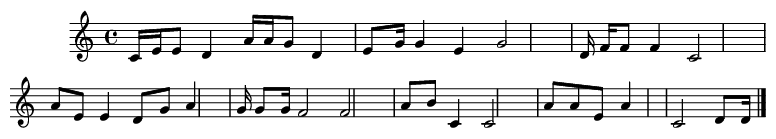

Notes <class 'list'>
Playable <class 'music21.stream.Part'>
Melody <class 'str'>


In [ ]:
import math
# Defining whether each interval size in half-steps is in the key
major = [0, 2, 4, 5, 7, 9, 11, 12] # intervals on major scale by # of half-steps

# major modes
ionian = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0}
mixolydian = ionian.copy(); mixolydian[7] = -1

# minor modes
dorian = mixolydian.copy(); dorian[3] = -1
aeolian = dorian.copy(); aeolian[6] = -1
phyrgian = aeolian.copy(); phyrgian[2] = -1
locrian = phyrgian.copy(); locrian[5] = -1

# major mode again
lydian = [(interval, shift + 1) for [interval, shift] in locrian.items()]

# Chance of a note that is in in the key
fidelity = 1.0



length = 40


notes, playable, melody1 = melody(length, scale = 5, key = 'c', fidelity = 1.0)

print("Notes", type(notes))
print("Playable", type(playable))
print("Melody", type(melody1))


In [ ]:
notes = {'c':0, 'd':2, 'e':4, 'f':5, 'g':7, 'a':9, 'b':11}
new_notes = notes.copy()
for i in notes:
    sharp = i + '#'
    flat = i + 'b'
    new_notes[sharp] = (notes[i] + 1) % 12
    new_notes[flat] = (notes[i] - 1) % 12

print("Length", len(new_notes))
print(new_notes)

Length 21
{'c': 0, 'd': 2, 'e': 4, 'f': 5, 'g': 7, 'a': 9, 'b': 11, 'c#': 1, 'cb': 11, 'd#': 3, 'db': 1, 'e#': 5, 'eb': 3, 'f#': 6, 'fb': 4, 'g#': 8, 'gb': 6, 'a#': 10, 'ab': 8, 'b#': 0, 'bb': 10}
